In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.ioff()
import seaborn as sns
sns.set_style("whitegrid")
from scipy import stats, integrate
from scipy.stats import kendalltau

import warnings
warnings.filterwarnings('ignore')

# %matplotlib notebook

In [3]:
def label_rotation(ax, angle):
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    return ax

In [4]:
df = pd.read_pickle('../data/atti-dirigenti.pkl')

In [5]:
df.shape

(153206, 13)

Let analyze the distribution of the data

In [6]:
df.head(5)

,CODICE_PRATICA,DATA_ATTO,DESCRIZIONE_TIPO_PRATICA,ID_TIPO,ID_TIPO_PRATICA,LINK_CONTENUTO_BINARIO,OGGETTO,PERSONA,STATUS,UFFICIO_AC,UFFICIO_DG,UFFICIO_SE,DETAIL_URL
0,20160140002016AD00000017201,2016-12-19,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,DGR 968/07 e s.m.i. Accreditamento degli organ...,013910,2,00000,50125,05873,http://www.regione.toscana.it/bancadati/atti/D...
1,20160140012016AD00000017466,2016-12-21,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,REG. CEE 2080/92 - AIUTI ALLE MISURE FORESTALI...,005595,2,00000,50117,05015,http://www.regione.toscana.it/bancadati/atti/D...
2,20160140022016AD00000017198,2016-12-19,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,"Servizi autorizzati ex art.14 L.R. 42/98 ""Norm...",019075,2,00000,50121,04838,http://www.regione.toscana.it/bancadati/atti/D...
3,20160140032016AD00000017208,2016-12-19,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,"L.R. 1/2006, DCR 3/2012, L.R. 1/2015 art.29, c...",020415,2,00000,50117,05018,http://www.regione.toscana.it/bancadati/atti/D...
4,20160140042016AD00000017268,2016-12-20,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,L.R. n. 87/1997 - Pubblicazione sul BURT dell'...,010826,2,00000,50116,05895,http://www.regione.toscana.it/bancadati/atti/D...


In [8]:
df.describe(include='all')

,CODICE_PRATICA,DATA_ATTO,DESCRIZIONE_TIPO_PRATICA,ID_TIPO,ID_TIPO_PRATICA,LINK_CONTENUTO_BINARIO,OGGETTO,PERSONA,STATUS,UFFICIO_AC,UFFICIO_DG,UFFICIO_SE,DETAIL_URL
count,153206,153206,153206,153206,153206,153206,153206,153206,153206.000000,153206,153206,153206,153206
unique,152455,4556,1,4,1,130730,148031,388,NaN,353,43,855,152455
top,20120012002012AD00000001151,2016-07-19 00:00:00,Atto dei dirigenti,AD,MON,http://www.regione.toscana.it/bancadati/atti/C...,"L.r. 55/2006 - ""Interventi in favore delle vit...",005549,NaN,00000,50073,0,http://www.regione.toscana.it/bancadati/atti/D...
freq,2,258,153206,62925,153206,21826,417,8022,NaN,44878,13890,29191,2
first,NaN,2000-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-03-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000509,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140910,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


From the describe we can see that:
1. there are some duplicates by `CODICE_PRATICA`
2. there are 4 distinct values for `ID_TIPO`
3. there is a subject that occurs 417 times
4. the person 005549 occurs 8022 time as signer for acts while the most frequent office is 50073

As tasks:
- we are going to remove duplicates for `CODICE_PRATICA`

In [9]:
df_drop = df.drop_duplicates(subset=['CODICE_PRATICA'])

In [10]:
df_drop.describe(include='all')

,CODICE_PRATICA,DATA_ATTO,DESCRIZIONE_TIPO_PRATICA,ID_TIPO,ID_TIPO_PRATICA,LINK_CONTENUTO_BINARIO,OGGETTO,PERSONA,STATUS,UFFICIO_AC,UFFICIO_DG,UFFICIO_SE,DETAIL_URL
count,152455,152455,152455,152455,152455,152455,152455,152455,152455.000000,152455,152455,152455,152455
unique,152455,4556,1,4,1,130730,148031,388,NaN,353,43,855,152455
top,20010020932001AD00000002380,2016-07-19 00:00:00,Atto dei dirigenti,AD,MON,http://www.regione.toscana.it/bancadati/atti/C...,"L.r. 55/2006 - ""Interventi in favore delle vit...",005549,NaN,00000,50073,0,http://www.regione.toscana.it/bancadati/atti/D...
freq,1,257,152455,62618,152455,21726,414,7989,NaN,44652,13826,29047,1
first,NaN,2000-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-03-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000256,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.099884,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


In [11]:
df = df_drop

## Data Exploration

as first step we want to answer to questions like:

- what is the distribution of acts per
    - year?
    - person?
    - UFFICIO_DG ?
    - UFFICIO_SE ?
    
At first we analyze what is the distribution of acts per year.

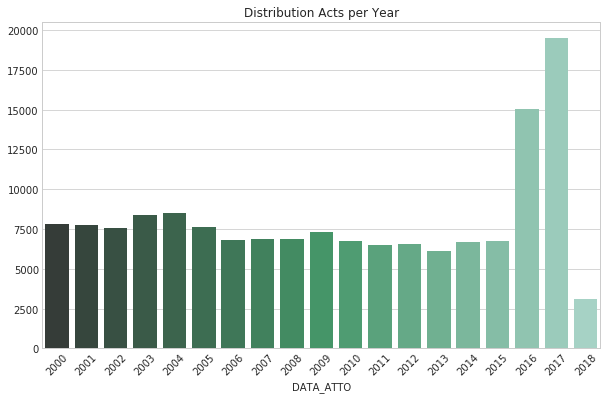

In [16]:
acts_per_year = df.groupby([df['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()

fig, ax = plt.subplots()
sns.barplot(acts_per_year.index, acts_per_year.values, palette="BuGn_d", ax=ax)
label_rotation(ax, 45)
fig.set_size_inches(10,6)
plt.title('Distribution Acts per Year')
plt.show(fig)

The distribution of the acts per year shows that there is an increase of acts for the years 2016 and 2017.
This is because in 2016 there was a grouping of the regional districts.

From another point of view is interesting to see the distribution of acts per person.

In [18]:
print('acts distribution per person')
acts_per_person = df.groupby([df['PERSONA']])['CODICE_PRATICA'].count().sort_values(ascending=False)
print(acts_per_person[:10])

acts distribution per person
PERSONA
005549    7989
020411    4316
005045    3816
015534    3778
007505    3060
014002    2645
013692    2103
005642    2013
005070    1943
017792    1836
Name: CODICE_PRATICA, dtype: int64


We scale the values in the range [0:1] to make the visualization more clear and plot the distribution.

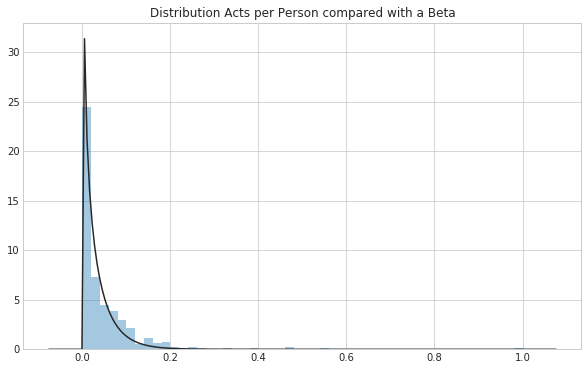

In [24]:
acts_per_person_scaled = (acts_per_person - acts_per_person.min()) / (acts_per_person.max() - acts_per_person.min())

fig, ax = plt.subplots()
sns.distplot(acts_per_person_scaled.values, kde=False, ax=ax, fit=stats.beta)
fig.set_size_inches(10,6)
plt.title('Distribution Acts per Person compared with a Beta')
plt.show()

Here we can see that the distribution follows a beta distribution. In particular, we can see there are many values below the mean (as show below).

Taking into account the domain under analysis this means that there are persons that works in Regione Toscana from long time.

In [25]:
print('mean observations {}'.format(acts_per_person_scaled.mean()))
print('std observations {}'.format(acts_per_person_scaled.std()))

mean observations 0.049064253596890185
std observations 0.08376901548737704


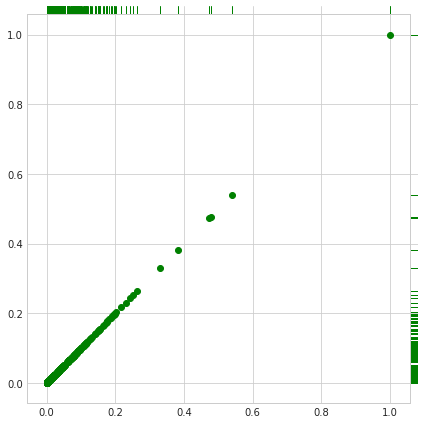

In [27]:
grid = sns.JointGrid(acts_per_person_scaled.values, acts_per_person_scaled.values, space=0, size=6, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

If we consider the top 10 persons we can see for example that the first persons has 31 years of career with the same position in Regione Toscana.

In [14]:
acts_per_person_scaled[:10]

PERSONA
005549    1.000000
020411    0.541080
005045    0.478369
015534    0.472634
007505    0.383369
014002    0.331629
013692    0.263184
005642    0.251839
005070    0.242987
017792    0.230021
Name: CODICE_PRATICA, dtype: float64

Since the data range from 2001 to 2018 there are several office which are closed or merged with others.
Let see what are:
- the offices active in the last 2 years
- the offices not active

In [121]:
group_office_year = df.groupby(by=[df['UFFICIO_DG'], df['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()

If we unstack the grouped data we can see what are the years of activity of the offices.

In [142]:
df_office_year = group_office_year.unstack()
df_office_year.head(10)

DATA_ATTO,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
UFFICIO_DG,,,,,,,,,,,,,,,,,,,
01025,NaN,1083.0,884.0,1063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01027,NaN,472.0,505.0,467.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01923,241.0,264.0,320.0,260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01928,711.0,666.0,697.0,636.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01931,1582.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01934,1346.0,1168.0,1126.0,1283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01937,1638.0,1654.0,1723.0,2143.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01943,860.0,942.0,894.0,1137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01946,638.0,849.0,918.0,941.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let us merge the index with the name of the offices.

In [155]:
df_office = pd.read_json('../data/strutture_processed.json')
df_office['ID'] = df_office['ID'].astype(str)

In [185]:
id_office_map = df_office.set_index(df_office['ID']).drop(['ID'], axis=1).to_dict()['NOME']

We check what are the offices that do not have a match

In [178]:
not_matched = []
matched = []
matched_id_name = {}

for i in df_office_year.index:
    if i in id_office_map:
        matched.append(id_office_map[i])
        matched_id_name[i] = id_office_map[i]
    else:
        not_matched.append(i)        

From the name of the offices it is interesting to see that there are:
- offices that changed the name 
- there are some abbreviations

we will create a replacement map to deal with these problems

In [179]:
matched_id_name

{'50000': 'D.G. PRESIDENZA                                       ',
 '50001': 'DIREZIONE GENERALE ORGANIZZAZIONE E SISTEMA INFORMATIV',
 '50002': 'DIREZIONE GENERALE BILANCIO E FINANZE                 ',
 '50003': 'DIREZIONE GENERALE SVILUPPO ECONOMICO                 ',
 '50004': 'DIREZIONE GENERALE POLITICHE TERRITORIALI E AMBIENTALI',
 '50005': 'DIREZIONE GENERALE DIRITTO ALLA SALUTE E POLITICHE DI ',
 '50006': 'DIREZIONE GENERALE POLITICHE FORMATIVE, BENI E ATTIVIT',
 '50007': 'D.G.  AVVOCATURA                                      ',
 '50026': 'DIREZIONE GENERALE SEGRETERIE ORGANI POLITICI DELLA GIUNTA',
 '50044': 'SEGRETERIE ORGANI POLITICI UFFICIO DI GABINETTO',
 '50069': 'D.G. ORGANIZZAZIONE E RISORSE                         ',
 '50073': "D.G. COMPETITIVITA' DEL SISTEMA REGIONALE E SVILUPPO D",
 '50079': 'D.G. DIRITTI DI CITTADINANZA E COESIONE SOCIALE       ',
 '50083': 'D.G. POLITICHE TERRITORIALI, AMBIENTALI E PER LA MOBIL',
 '50102': 'D.G. ORGANIZZAZIONE                     

In [209]:
to_replace = {
    '50001': '50115',
    '50069': '50115',
    '50102': '50115',
    '50083': '50004',
    '50079': '50116',
    '50118': '50202',
    '50121': '50201'
}

- We can replace the offices with wrong names
- we reaplace the codes with the canonical names of the offices

In [213]:
df_replaced = df
df_replaced['UFFICIO_DG'] = df['UFFICIO_DG'].replace(to_replace)

In [224]:
df= df_replaced.replace(matched_id_name)

In [225]:
df.head()

,CODICE_PRATICA,DATA_ATTO,DESCRIZIONE_TIPO_PRATICA,ID_TIPO,ID_TIPO_PRATICA,LINK_CONTENUTO_BINARIO,OGGETTO,PERSONA,STATUS,UFFICIO_AC,UFFICIO_DG,UFFICIO_SE,DETAIL_URL
0,20160140002016AD00000017201,2016-12-19,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,DGR 968/07 e s.m.i. Accreditamento degli organ...,013910,2,00000,DIREZIONE ISTRUZIONE E FORMAZIONE,05873,http://www.regione.toscana.it/bancadati/atti/D...
1,20160140012016AD00000017466,2016-12-21,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,REG. CEE 2080/92 - AIUTI ALLE MISURE FORESTALI...,005595,2,00000,DIREZIONE AGRICOLTURA E SVILUPPO RURALE,05015,http://www.regione.toscana.it/bancadati/atti/D...
2,20160140022016AD00000017198,2016-12-19,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,"Servizi autorizzati ex art.14 L.R. 42/98 ""Norm...",019075,2,00000,"DIREZIONE GENERALE POLITICHE MOBILITA', INFRAS...",04838,http://www.regione.toscana.it/bancadati/atti/D...
3,20160140032016AD00000017208,2016-12-19,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,"L.R. 1/2006, DCR 3/2012, L.R. 1/2015 art.29, c...",020415,2,00000,DIREZIONE AGRICOLTURA E SVILUPPO RURALE,05018,http://www.regione.toscana.it/bancadati/atti/D...
4,20160140042016AD00000017268,2016-12-20,Atto dei dirigenti,ADN,MON,http://www.regione.toscana.it/bancadati/atti/C...,L.R. n. 87/1997 - Pubblicazione sul BURT dell'...,010826,2,00000,DIREZIONE DIRITTI DI CITTADINANZA E COESIONE S...,05895,http://www.regione.toscana.it/bancadati/atti/D...


Now let's group the acts per Ufficio DG. Also in this case we can see there are some office that around 14000 acts.

distribution acts per Ufficio DG
Top 10 
 UFFICIO_DG
D.G. COMPETITIVITA' DEL SISTEMA REGIONALE E SVILUPPO D    13826
DIREZIONE AGRICOLTURA E SVILUPPO RURALE                   12228
DIREZIONE GENERALE POLITICHE TERRITORIALI E AMBIENTALI    11820
DIREZIONE ORGANIZZAZIONE E SISTEMI INFORMATIVI            11444
DIREZIONE GENERALE SVILUPPO ECONOMICO                      9724
DIREZIONE DIRITTI DI CITTADINANZA E COESIONE SOCIALE       9278
D.G. PRESIDENZA                                            8290
POLITICHE AMBIENTALI, ENERGIA E CAMBIAMENTI CLIMATICI      7613
DIREZIONE GENERALE DIRITTO ALLA SALUTE E POLITICHE DI      7479
01937                                                      7160
Name: CODICE_PRATICA, dtype: int64
Last 10 
 UFFICIO_DG
01923                                                           1085
ALTRI UFFICI                                                     790
DIREZIONE GENERALE DIREZIONE GENERALE DELLA GIUNTA REGIONALE     742
DIREZIONE CULTURA E RICERCA                 

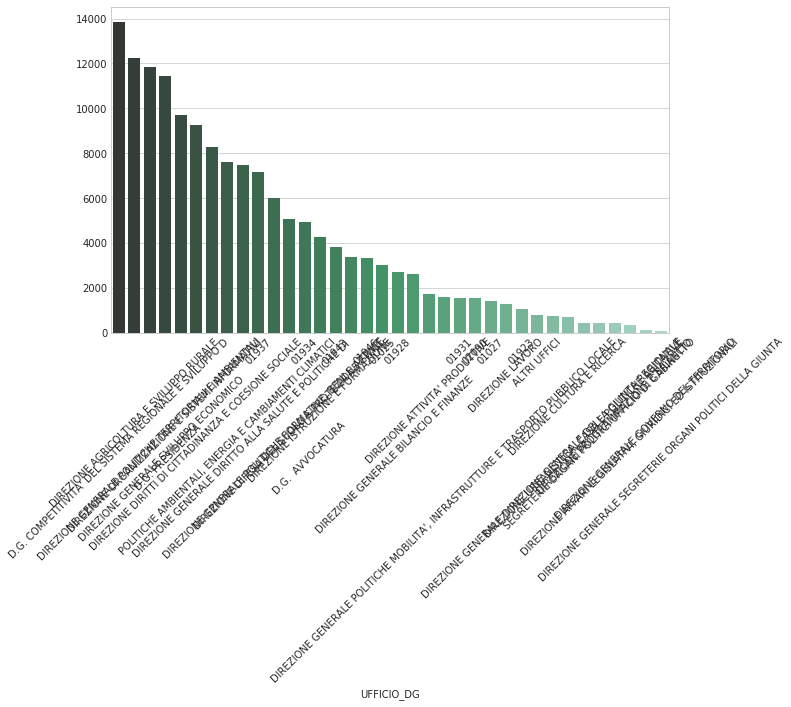

In [228]:
print('distribution acts per Ufficio DG')
acts_per_office = df.groupby([df['UFFICIO_DG']])['CODICE_PRATICA'].count()
acts_per_office = acts_per_office.sort_values(ascending=False)
print('Top 10 \n',acts_per_office[:10])
print('Last 10 \n',acts_per_office[-10:])

fig, ax = plt.subplots()
sns.barplot(acts_per_office.index, acts_per_office.values, palette="BuGn_d", 
            ax=ax, order=acts_per_office.index)
label_rotation(ax, 45)
fig.set_size_inches(10,6)
plt.show(fig)

As final exploration it would be interesting to see for the top person what is the distributions of acts per year

In [229]:
df_person = df[df['PERSONA'] == '005549']
acts_per_year_person = df_person.groupby([df_person['DATA_ATTO'].dt.year])['CODICE_PRATICA'].count()
acts_per_year_person

DATA_ATTO
2000     104
2001      92
2002      59
2003     121
2004     100
2005     109
2006     160
2007     128
2008     107
2009     133
2010     162
2011     178
2012     180
2013      62
2014     119
2015     122
2016    2402
2017    3178
2018     473
Name: CODICE_PRATICA, dtype: int64

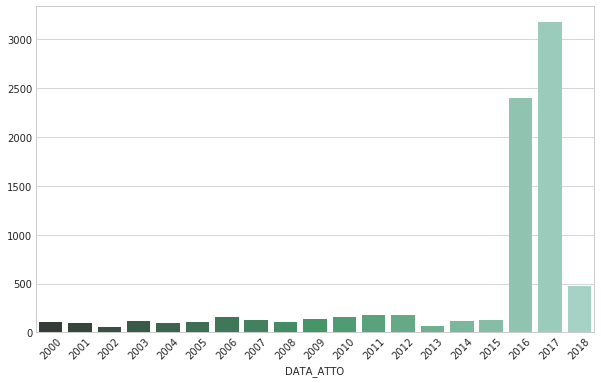

In [230]:
fig, ax = plt.subplots()
sns.barplot(acts_per_year_person.index, acts_per_year_person.values, palette="BuGn_d", 
            ax=ax, order=acts_per_year_person.index)
label_rotation(ax, 45)
fig.set_size_inches(10,6)
plt.show(fig)

Here we can see that apart 2016 and 2017 this person did in average the same number of acts.

It would be interesting to see the contribution of each person per office in order to spot:
- when a person moves from one office to another
- Who is in charge of an office (considering that if a person is in charge sign more acts than the others)

## Next Step

After the data exploration the next steps of this notebook is to write a classification model able to predict the office that writes the act given the text in the subject (Oggetto) attribute.

In [231]:
pd.to_pickle(df,'../data/atti-dirigenti-processed.pkl')